# Installing and loading packages

In [239]:
#install.packages("here")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
#install_all_packages()
load_library_packages()

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

[[28]]
[1] TRUE

# Unsupervised Learning

### Those model needs the one hot encoded version of our data

In [168]:
df_copy <- df
df_copy[, "strange_dp"] <- strange_dp
df_copy[, "strange_p"] <- strange_p
has_tag_depression <- df$TAG == "1" | df$depression  == "1" 
df_copy[, "has_tag_depression"] <- has_tag_depression
dummy <- dummyVars(" ~ .", data=before_dataset)
before_encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 

## PCA

In [17]:
before_encoded_dataset.pca <- prcomp(before_encoded_dataset , center = TRUE,scale. = TRUE)
summary(before_encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.90318 2.28711 2.27063 2.13388 1.95700 1.90935 1.89493
Proportion of Variance 0.05936 0.03684 0.03631 0.03207 0.02697 0.02567 0.02529
Cumulative Proportion  0.05936 0.09619 0.13250 0.16457 0.19154 0.21721 0.24250
                           PC8     PC9   PC10   PC11    PC12    PC13    PC14
Standard deviation     1.81427 1.77926 1.7390 1.7018 1.66114 1.64506 1.60614
Proportion of Variance 0.02318 0.02229 0.0213 0.0204 0.01943 0.01906 0.01817
Cumulative Proportion  0.26568 0.28797 0.3093 0.3297 0.34910 0.36816 0.38632
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     1.58309 1.57145 1.55611 1.54833 1.53428 1.5167 1.49605
Proportion of Variance 0.01765 0.01739 0.01705 0.01688 0.01658 0.0162 0.01576
Cumulative Proportion  0.40397 0.42136 0.43842 0.45530 0.47188 0.4881 0.50384
                          PC22    PC23

Seems that PC1 and PC2 do not explain much about out that variance. TSNE could be a better solution

### Colouring exercise practice before the pandemic

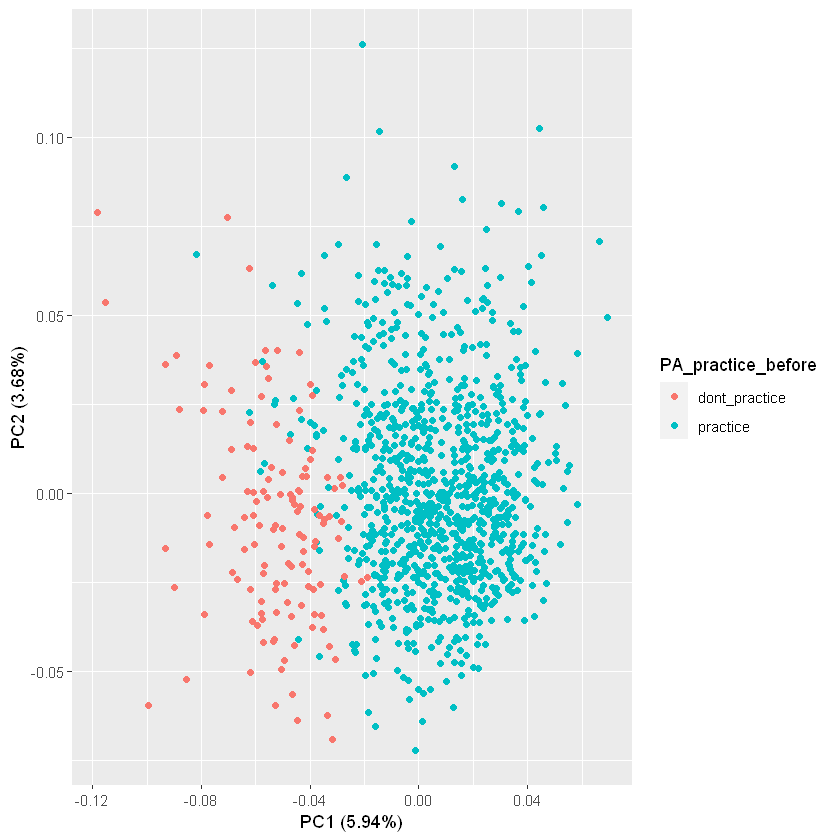

In [18]:
autoplot(before_encoded_dataset.pca, colour="PA_practice_before", data=before_dataset)

## TSNE

In [144]:
tsne <- Rtsne(before_encoded_dataset, dims = 2, perplexity=50, check_duplicates = FALSE, verbose=TRUE)

Performing PCA
Read the 1242 x 50 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 50.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.55 seconds (sparsity = 0.169165)!
Learning embedding...
Iteration 50: error is 65.520958 (50 iterations in 0.35 seconds)
Iteration 100: error is 65.520958 (50 iterations in 0.25 seconds)
Iteration 150: error is 65.520958 (50 iterations in 0.26 seconds)
Iteration 200: error is 65.520958 (50 iterations in 0.24 seconds)
Iteration 250: error is 65.520950 (50 iterations in 0.24 seconds)
Iteration 300: error is 1.881382 (50 iterations in 0.29 seconds)
Iteration 350: error is 1.733278 (50 iterations in 0.26 seconds)
Iteration 400: error is 1.677203 (50 iterations in 0.25 seconds)
Iteration 450: error is 1.652789 (50 iterations in 0.28 seconds)
Iteration 500: error is 1.635486 (50 iterations in 0.39 seconds)
Iteration 550: error is 1.621352 (50 iterations in 0.28 seconds)
Iteration 60

### Colouring exercise practice before the pandemic

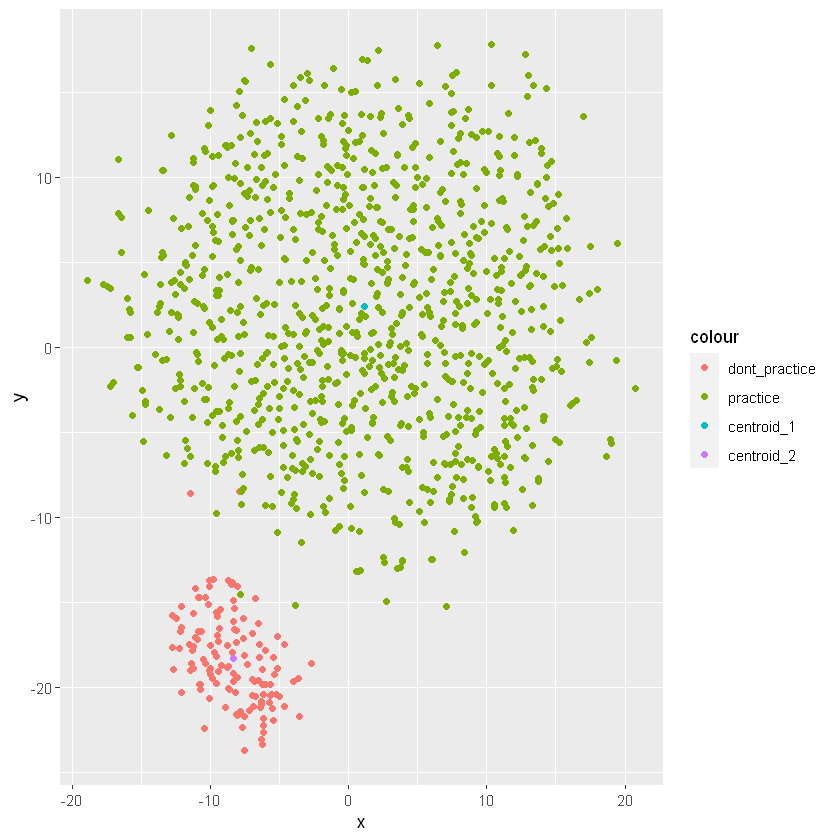

In [183]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_before )


tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

tsne_df_centroids <- tsne_df
# Defining the practice centroid points
practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$x)
practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "practice", ]$y)

# Defining the dont_practice centroid points
dont_practice_centroid_x <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$x)
dont_practice_centroid_y <- mean(tsne_df_centroids[tsne_df_centroids["colour"] == "dont_practice", ]$y)

# Adding centroids to dataset
levels(tsne_df_centroids$colour) <- c(levels(tsne_df_centroids$colour), "centroid_1", "centroid_2")

# Plotting the data points
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(practice_centroid_x, practice_centroid_y, "centroid_1")
tsne_df_centroids[nrow(tsne_df_centroids) + 1, ] <- list(dont_practice_centroid_x, dont_practice_centroid_y, "centroid_2")
ggplot(tsne_df_centroids, aes(x, y, colour = colour)) + geom_point()


### Colouring exercise practice during the pandemic

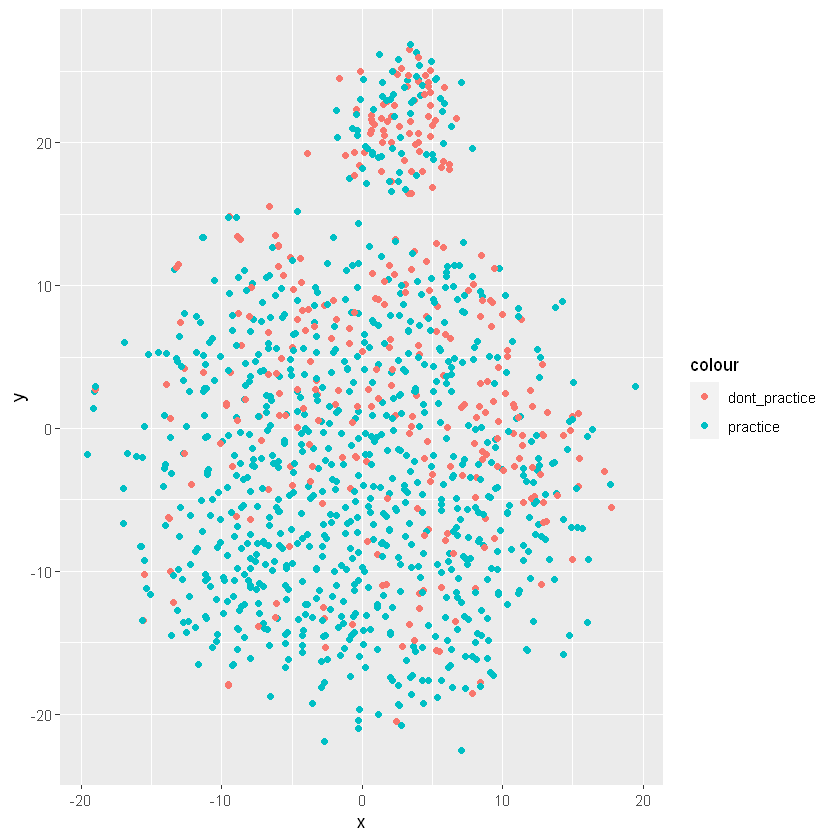

In [21]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$PA_practice_during )
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Clusters now are not well defined

### Strange don't practice

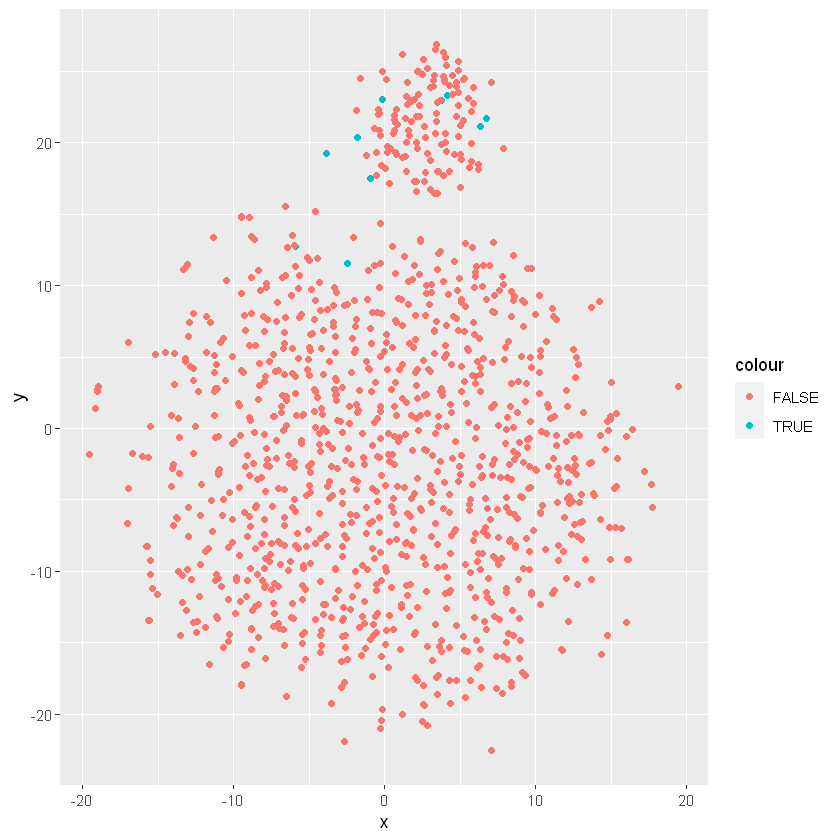

In [22]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_dp)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()

Most of strange don't practice belong to the don't practice cluster, we can keep that data and exclude the ones far from that cluster.


### Strange practice

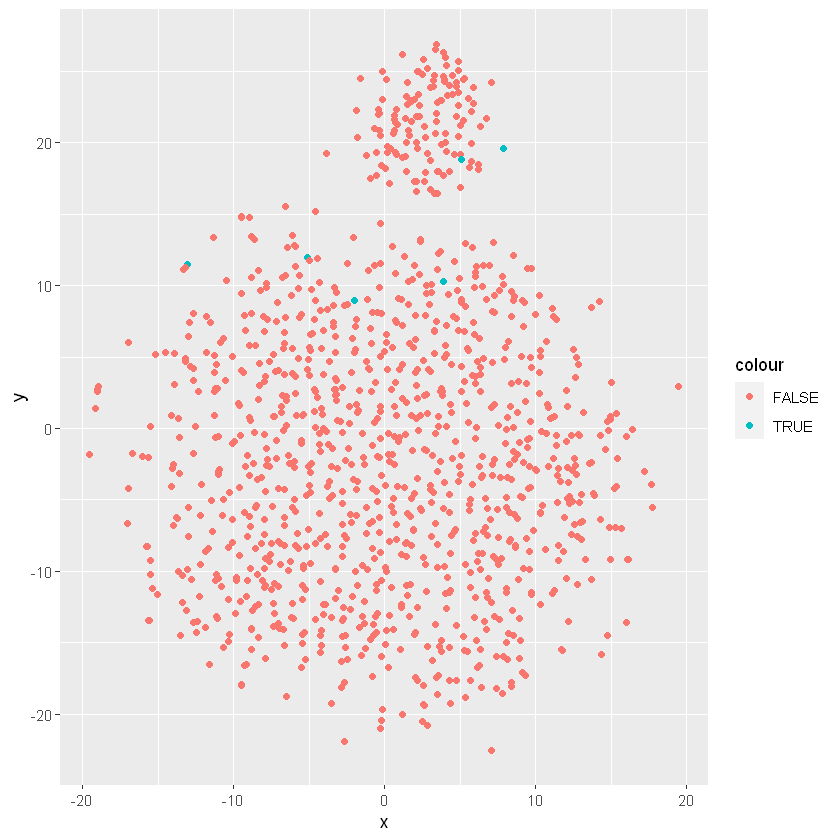

In [23]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$strange_p)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()


We can keep the strange practice people that belongs to the practice cluster, but exclude the others.

## Rejecting the outliers 

In [230]:
distances <- distance_to_centroids(tsne_df, strange_dp, "practice", "dont_practice")

distances

id,d1,d2
<chr>,<dbl>,<dbl>
18,20.41695,3.394932
32,20.73922,3.732015
55,23.46423,2.596727
64,16.73404,10.181781
77,23.27730,2.215315
87,14.12252,9.848492
112,22.90035,5.135903
125,25.47761,4.448801
128,27.41967,4.668853


In [240]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_dp
outliers_result <- outliers_checker(distances, pa_dataset_copy, "PA_practice_during")

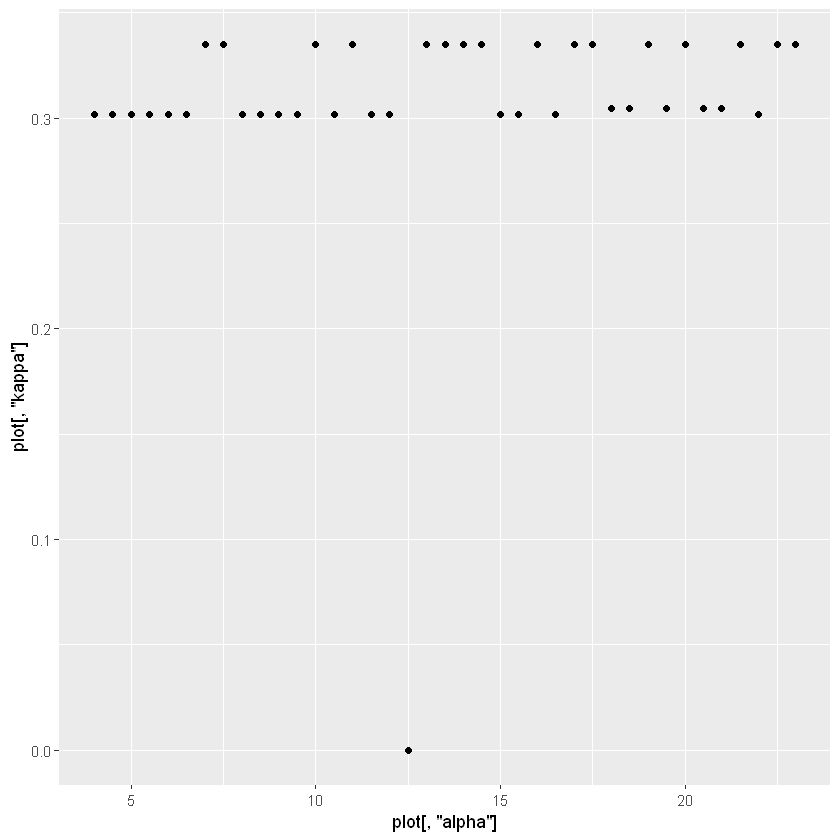

In [249]:
plot <- outliers_result$kappa_x_alpha

ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

### Has tag or depression

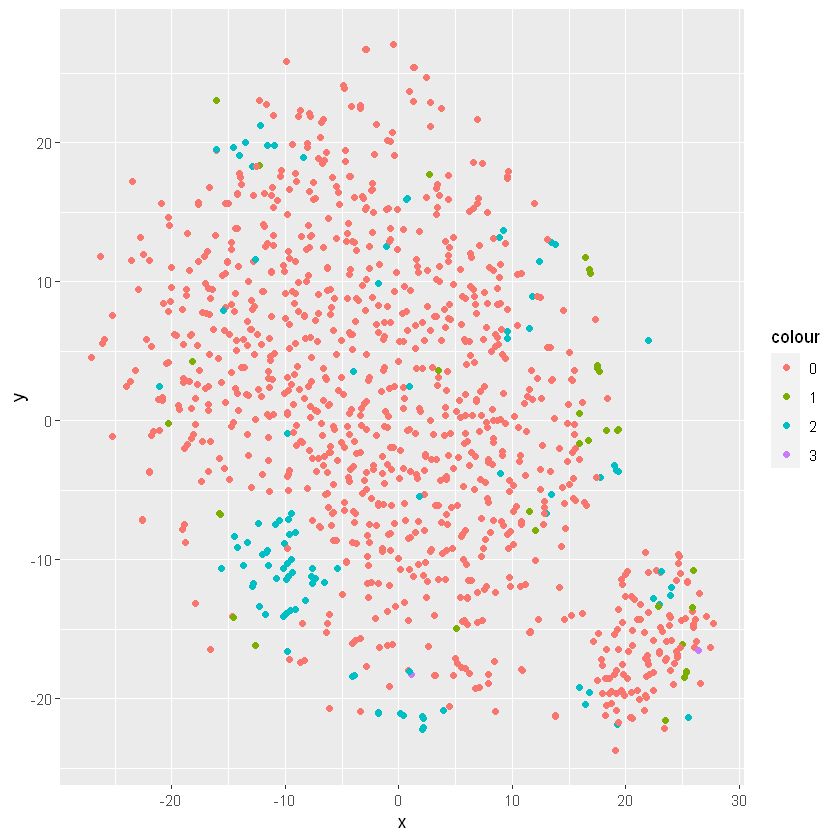

In [ ]:
metadata <- data.frame(sample_id = rownames(df_copy),
                       colour = df_copy$depression_anxiety)
tsne_df <- data.frame(
    x = tsne$Y[,1],
    y = tsne$Y[,2],
    colour = metadata$colour)

ggplot(tsne_df, aes(x, y, colour = colour)) + geom_point()